In [8]:
import pandas as pd 

#read data from csv
filepath = 'C:\\Users\\talat\\OneDrive\\Desktop\\4-2\\Machine Learning\\Coding Assignments\\Assignment 1\\data - data.csv'
header_names = ['YEAR', 'Rainfall in June']
data = pd.read_csv(filepath, usecols=header_names)

#display number of rows and contents of the DataFrame 
print(f"Number of rows: {len(data)}")
print(data)

#Generate descriptive statistics 
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats[['Rainfall in June']])

Number of rows: 117
     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]
Descriptive Statistics:
       Rainfall in June
count        113.000000
mean          72.957522
std           35.968989
min           17.700000
25%           48.500000
50%           69.900000
75%           90.600000
max          161.000000


In [9]:
# impute missing values with median
median_rainfall = data['Rainfall in June'].median()
data['Rainfall in June'].fillna(median_rainfall, inplace=True)

In [10]:
# remove duplicates 
data.drop_duplicates(inplace=True)

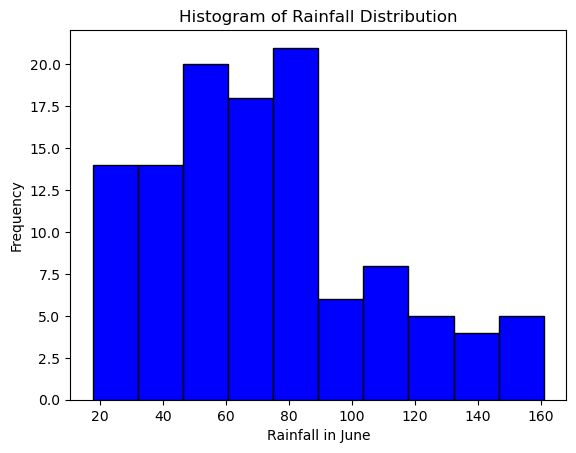

In [11]:
#create a histogram plot
import matplotlib.pyplot as plt

plt.hist(data['Rainfall in June'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Rainfall Distribution')
plt.xlabel('Rainfall in June')
plt.ylabel('Frequency')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling
standard_scaler = StandardScaler()
data['Rainfall in June StandardScaled'] = standard_scaler.fit_transform(data[['Rainfall in June']])

# MinMax scaling
minmax_scaler = MinMaxScaler()
data['Rainfall in June MinMaxScaled'] = minmax_scaler.fit_transform(data[['Rainfall in June']])

print(data)

     YEAR  Rainfall in June  Rainfall in June StandardScaled  \
0    1901              22.7                        -1.417921   
1    1902              59.9                        -0.352687   
2    1903              26.2                        -1.317697   
3    1904              53.4                        -0.538817   
4    1905              23.1                        -1.406466   
..    ...               ...                              ...   
112  2011             119.5                         1.353977   
113  2012              21.7                        -1.446556   
114  2013             155.0                         2.370530   
115  2014              31.3                        -1.171657   
116  2015              90.6                         0.526416   

     Rainfall in June MinMaxScaled  
0                         0.034892  
1                         0.294487  
2                         0.059316  
3                         0.249128  
4                         0.037683  
..       

In [13]:
# Step 8: Build a Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assuming 'YEAR' is the independent variable (features) and 'Rainfall in June' is the dependent variable (target)
x = data[['YEAR']]
y = data['Rainfall in June']

# Split the data into training and testing sets (80-20 rule)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression().fit(x_train, y_train)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, model.predict(x_test))
rmse = (mse)**0.5
mae = metrics.mean_absolute_error(y_test, model.predict(x_test))

print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")
print(f"Mean Absolute Error (MAE) of the test data: {mae}")

Mean Squared Error (MSE) of the test data: 1565.237252641752
Root Mean Squared Error (RMSE) of the test data: 39.56307941303043
Mean Absolute Error (MAE) of the test data: 32.104436059010254


In [14]:
# Step 9: Rerun with 70:30 train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(x_train, y_train)

mse = metrics.mean_squared_error(y_test, model.predict(x_test))
rmse = (mse)**0.5
mae = metrics.mean_absolute_error(y_test, model.predict(x_test))

print(f"\nResults with 70:30 train-test split:")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")
print(f"Mean Absolute Error (MAE) of the test data: {mae}")


Results with 70:30 train-test split:
Mean Squared Error (MSE) of the test data: 1485.296189643908
Root Mean Squared Error (RMSE) of the test data: 38.53954059980357
Mean Absolute Error (MAE) of the test data: 32.20619655694001


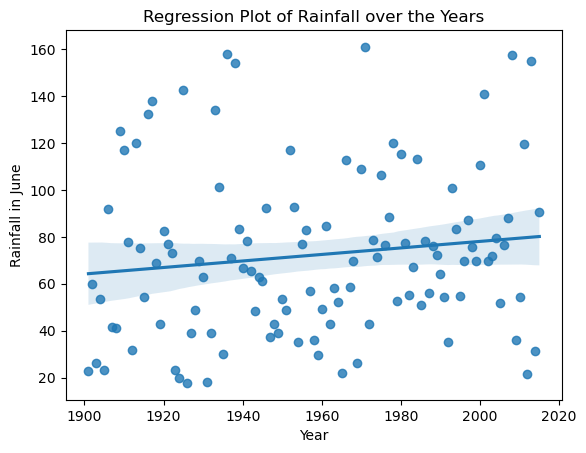

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'YEAR' is on the x-axis and 'Rainfall in June' on the y-axis
sns.regplot(x='YEAR', y='Rainfall in June', data=data)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall in June')
plt.title('Regression Plot of Rainfall over the Years')

# Show the plot
plt.show()
